# 1 - Load the dataset

We will use the dataset called "California Housing" from sklearn library to demonstration an implementation of a Decision Tree. This dataset has 20640 samples with 8 features (columns). Here target variable is the price of the house.

In [1]:
#import the libs
from sklearn.datasets import fetch_california_housing
#load the dataset
house_data = fetch_california_housing()  #returns dictionary-like object, attributes are - data, target, DESCR
#first of all, let's see the shape of the training data
print(house_data.data.shape)

(20640, 8)


In [2]:
#shape of a target/labels
print(house_data.target.shape)

(20640,)


In [3]:
#important info about the dataset
print(house_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
import numpy as np       # Import numpy to use the numpy arrays, the structure of those arrays is designed to be optimal for calculations

X = house_data.data      # features of each house
X = np.array(X)
prices = house_data.target    # price of each house
y = [1 if price > 2 else 0 for price in prices]   # 1 is high house price, 0 is low house price
y = np.array(y)

In [5]:
print('Input features: ', ', '.join(house_data.feature_names))
print(X.shape)

Input features:  MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
(20640, 8)


Meaning of each feature:
* MedInc: median income in block group
* HouseAge: median house age in block group
* AveRooms: average number of rooms per household
* AveBedrms: average number of bedrooms per household
* Population: block group population
* AveOccup: average number of household members
* Latitude: block group latitude
* Longitude: block group longitude

These features contribute when evaluating prices of houses.


y = 1 when the house price is greater than 200,000 USD, otherwise y = 0.

# Build Decision Tree model and train it

In [6]:
from sklearn.tree import DecisionTreeClassifier     # import the Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=3)      # Limit the depth of the tree to prevent overfitting
tree_clf.fit(X, y)                                  # Fit data and their label to train the model

DecisionTreeClassifier(max_depth=3)

# Visualise the Decision Tree

We use function export_graphviz() to visualise the Decision Tree. In this function, we just need to pass the trained Decision Tree model, feature names, and labels via the parameter "class_names"

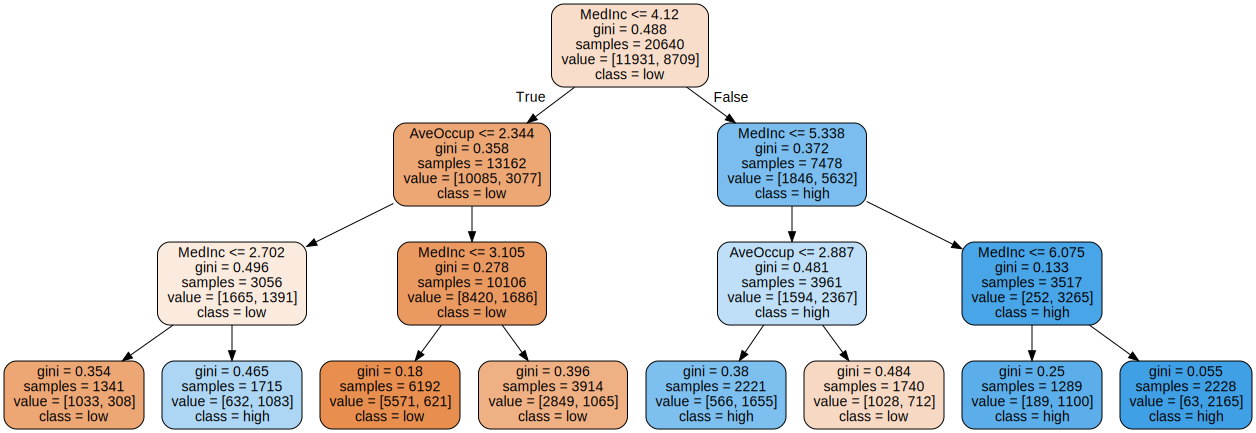

In [7]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file = None, 
                                feature_names = house_data.feature_names,  
                                class_names = ['low', 'high'],
                                rounded = True,
                                filled = True)

graph = graphviz.Source(dot_data, format="png")
graph

# Test the Decisicion Tree

We will test the trained Decision Tree against the value of the first sample in the dataset (X[0]) and see if our Decision Tree can predict the correct label (0 or 1) for this sample.

In [8]:
import pandas as pd

x = X[0].reshape(1, -1)     # Reshape to 2D array, because the function predict_proba() requires the parameter in 2D array
print("The true price of this house is: {:,} USD".format(prices[0] * 100000))
y_pred = tree_clf.predict_proba(x)
print("The probabilities generated by our Decision Tree are:")
print('Probability y = 0 (low price): {}'.format(y_pred[0][0]))
print('Probability y = 1 (high price): {}'.format(y_pred[0][1]))
print('Predicted label {}'.format(tree_clf.predict(x)[0]))
print('(1 means high price (> 200,000 USD), 0 means low price (<= 200,000 USD))')

The true price of this house is: 452,600.0 USD
The probabilities generated by our Decision Tree are:
Probability y = 0 (low price): 0.02827648114901257
Probability y = 1 (high price): 0.9717235188509874
Predicted label 1
(1 means high price (> 200,000 USD), 0 means low price (<= 200,000 USD))
